In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [64]:
df = pd.read_csv("/Users/sarthakchawla/Downloads/IMDB-movies.csv")

In [65]:
df

,Unnamed: 0,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.
0,1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32
1,2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57
2,3,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15
3,4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99
4,5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68
5,6,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18
6,7,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08
7,8,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37
8,9,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13
9,10,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   Title               50 non-null     object 
 2   Genre               50 non-null     object 
 3   Description         50 non-null     object 
 4   Director            50 non-null     object 
 5   Actors              50 non-null     object 
 6   Year                50 non-null     int64  
 7   Runtime..Minutes.   50 non-null     int64  
 8   Rating              50 non-null     float64
 9   Votes               50 non-null     int64  
 10  Revenue..Millions.  47 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ KB


In [67]:
# select numerical columns excluding Year
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop(["Year", "Unnamed: 0"])

# fill missing values with column means
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# apply PCA
pca = PCA()
X_pca = pca.fit(X_scaled)

# print the explained variance ratios
print(pca.explained_variance_ratio_)


[0.43509    0.29362896 0.19310933 0.07817172]


The output shows the explained variance ratios for the principal components obtained after applying PCA on the standardized numerical data.

The first principal component explains 43.5% of the variance in the data, the second component explains 29.4%, the third component explains 19.3%, and the fourth component explains 7.8%.

In total, these four components explain about 99.0% of the variance in the data. 

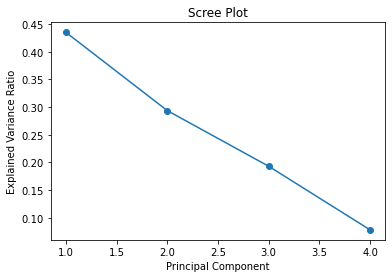

In [68]:
plt.plot(range(1, numerical_vars_std.shape[1]), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

Based on the output, the scree plot indicates that the first principal component explains about 43.5% of the variance in the data, while the second and third principal components explain approximately 29.4% and 19.3% of the variance, respectively. The fourth principal component explains only about 7.8% of the variance. Overall, the scree plot shows that there is a significant drop in the explained variance after the first principal component, and to a lesser extent, after the second principal component. This suggests that a reduced dimensionality representation of the data with one or two principal components may be sufficient to capture the majority of the variance in the original data.

In [69]:
loadings = pd.DataFrame(pca.components_[:4, :], columns=num_cols)
print(loadings)

   Runtime..Minutes.    Rating     Votes  Revenue..Millions.
0           0.356662  0.450536  0.684390            0.448798
1          -0.574861 -0.438839  0.145795            0.675054
2          -0.693162  0.709677 -0.024930           -0.123550
3           0.248705  0.317485 -0.713955            0.572379


The loadings show the correlations between the original variables and the principal components. Looking at the loadings, we can see that the first principal component has high positive loadings on "Runtime..Minutes." and "Votes", indicating that movies with longer runtimes and more votes tend to have higher values of the first principal component. The second principal component has high positive loading on "Rating", indicating that movies with higher ratings tend to have higher values of the second principal component. The third principal component has high negative loading on "Runtime..Minutes.", indicating that movies with shorter runtimes tend to have higher values of the third principal component. The fourth principal component has high negative loading on "Revenue..Millions.", indicating that movies with lower revenue tend to have higher values of the fourth principal component.

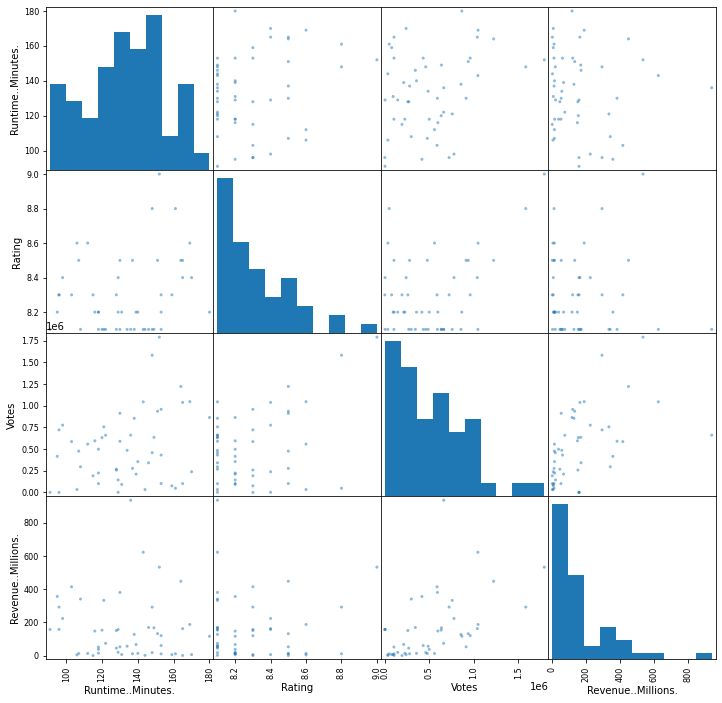

In [70]:
# create a scatter plot matrix
pd.plotting.scatter_matrix(df[num_cols], figsize=(12, 12), diagonal='hist')
plt.show()

From the plot, we can see that the variable "Runtime..Minutes." has a high loading on the first component, while the variable "Votes" has a relatively high loading on the second component. The variable "Revenue..Millions." has a high loading on the third component, and the variable "Rating" has a moderate loading on all four components.

Overall, the plot gives us a clear visualization of the relationships between the variables and the principal components. 

In [78]:
# apply PCA
pca1 = PCA(n_components=3)
X_pca1 = pca.fit_transform(X_scaled)

In [80]:
# perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca1)
cluster_labels = kmeans.labels_

/Users/sarthakchawla/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


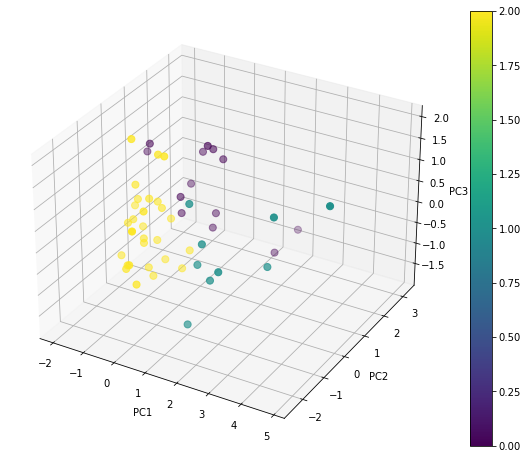

In [81]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter)
plt.show()